“Al entregar la solución de este examen, yo, **JUAN CARLOS MARTINEZ REY** con código **202010509** me comprometo a no 
conversar durante el desarrollo de este examen con ninguna persona diferente a los profesores del curso 
sobre aspectos relacionados con el examen; tampoco utilizaré algún medio de comunicación por voz, texto o 
intercambio de archivos, para consultar o compartir con otros, información sobre el tema del examen antes de 
entregarlo. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer 
fraude en este examen”. 

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
!pip install plotly==4.5.2

In [1]:
import pandas as pd
import missingno as msno
%matplotlib inline

#Pandas profiling
from pandas_profiling import ProfileReport
import seaborn as sns

In [2]:
url_datos = 'https://raw.githubusercontent.com/Draka/ds-cafeina/main/presion_sistolica.csv'
data_org=pd.read_csv(url_datos,encoding='utf-8',sep=';', index_col=False)

In [3]:
data_org.shape

(102515, 9)

# I. Exploración de los datos

Este proceso se encarga de visualización de los datos, columnas, cantidad de registros, variable de interés, tipos de datos

In [4]:
data = data_org
data.head()

id  tazas_cafe  edad  ...          tc  etnicidad  presion_sis
0  63120         2.0  27.0  ...  164.540130          0       136.57
1  42957         1.0  69.0  ...  169.683363          0       116.48
2  39221         2.0  40.0  ...  113.783536          1       118.85
3  42621         1.0   NaN  ...  210.724015          1       139.42
4  26234         2.0  42.0  ...  162.950980          1       124.94

[5 rows x 9 columns]

## I. 1.
**Descripción de variables**

|id|Descripción|
|--|--|
|id|Un identificador de la persona que participó en el estudio|
|tazas_cafe|Número de tazas de café al día que toma la persona en promedio (según reporte de la persona)
|edad|Edad de la persona al momento del estudio
|genero|Genero reportado de la persona
|fumador|0 – No fumador 1- Sí fumador
|imc|Índice de masa corporal de la persona. $$IMC = peso\left/(altura\right)^{2}$$
|ec|Colesterol en sangre el día del estudio El colesterol en la sangre es una medida compuesta del colesterol LDL, HDL y 20% de los triglicéridos.
|etnicidad|Auto-reporte de la identidad étnica o racial. No se permitieron varias selecciones. 0 – blanco, 1- negro, 2 – hispano
|presion_sis|Presión sistólica el día del estudio.

**Tipos de datos**

In [5]:
data_org.dtypes

id               int64
tazas_cafe     float64
edad           float64
genero          object
fumador          int64
imc            float64
tc             float64
etnicidad        int64
presion_sis    float64
dtype: object

# Preparación de los datos

Comprobar las ausencias

In [6]:
data_org.isna().sum()

id                0
tazas_cafe        0
edad           7042
genero            0
fumador           0
imc            3811
tc                0
etnicidad         0
presion_sis       0
dtype: int64

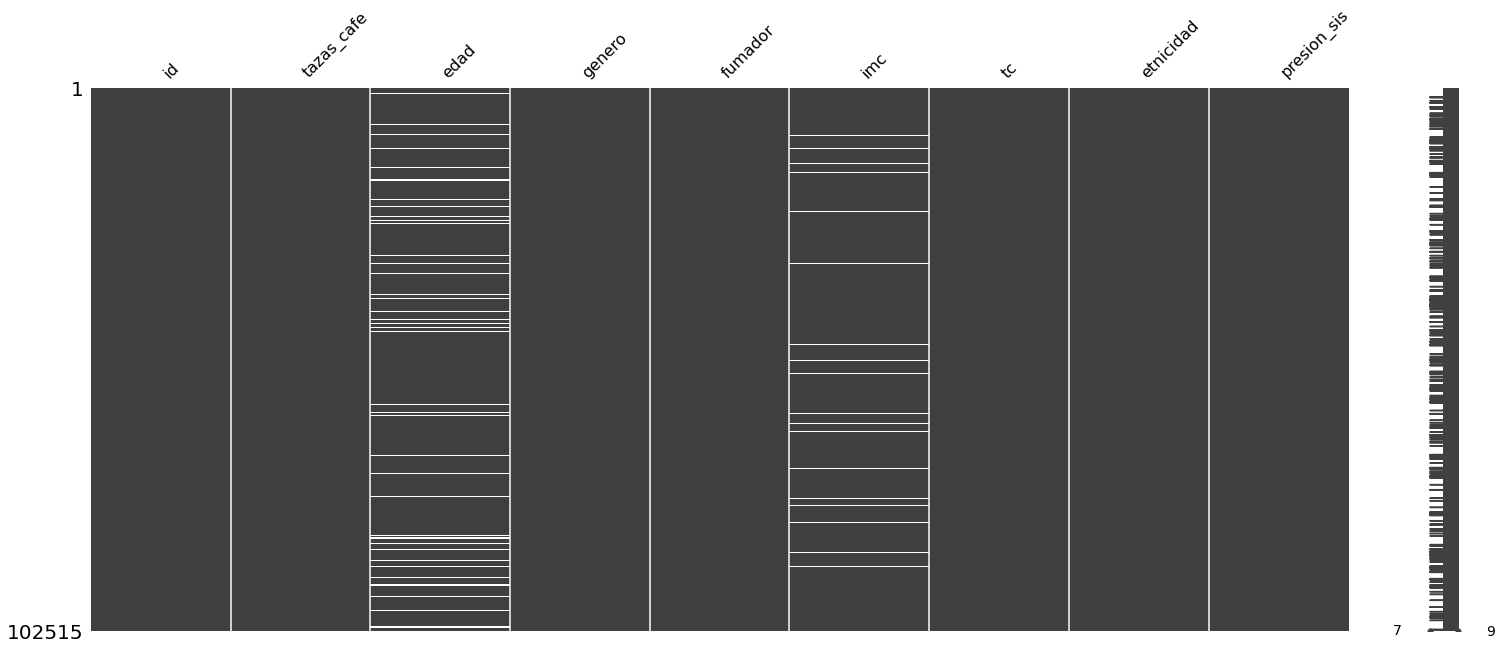

In [7]:
msno.matrix(data_org)

In [8]:
data_org.isna().sum()/len(data_org)

id             0.000000
tazas_cafe     0.000000
edad           0.068692
genero         0.000000
fumador        0.000000
imc            0.037175
tc             0.000000
etnicidad      0.000000
presion_sis    0.000000
dtype: float64

Limpieza de datos, vacíos y duplicados

In [9]:
print('Cantidad original:', data_org.shape)
data=data_org
data=data.dropna()
print('Cantidad luego de borrar vacíos:', data.shape)
data=data.drop_duplicates()
print('Cantidad luego de borrar duplicados:', data.shape)

Cantidad original: (102515, 9)
Cantidad luego de borrar vacíos: (91926, 9)
Cantidad luego de borrar duplicados: (57476, 9)


In [10]:
#variables para trabajar
data = data.drop(['id'], axis=1)
data

tazas_cafe  edad     genero  ...          tc  etnicidad  presion_sis
0              2.0  27.0  Masculino  ...  164.540130          0       136.57
1              1.0  69.0   Femenino  ...  169.683363          0       116.48
2              2.0  40.0   Femenino  ...  113.783536          1       118.85
4              2.0  42.0  Masculino  ...  162.950980          1       124.94
5              3.0  24.0  Masculino  ...  243.709170          0       120.37
...            ...   ...        ...  ...         ...        ...          ...
102499         6.0  22.0  Masculino  ...  175.987652          1       131.13
102501         0.0  32.0   Femenino  ...  157.787785          0       107.34
102505         2.0  34.0   Femenino  ...  208.173194          0        93.57
102510         2.0  29.0   Femenino  ...  192.903601          0       117.59
102511         0.0  25.0   Femenino  ...  169.972908          2        99.29

[57476 rows x 8 columns]

In [70]:
ProfileReport(data, title="Perfilamiento de datos")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

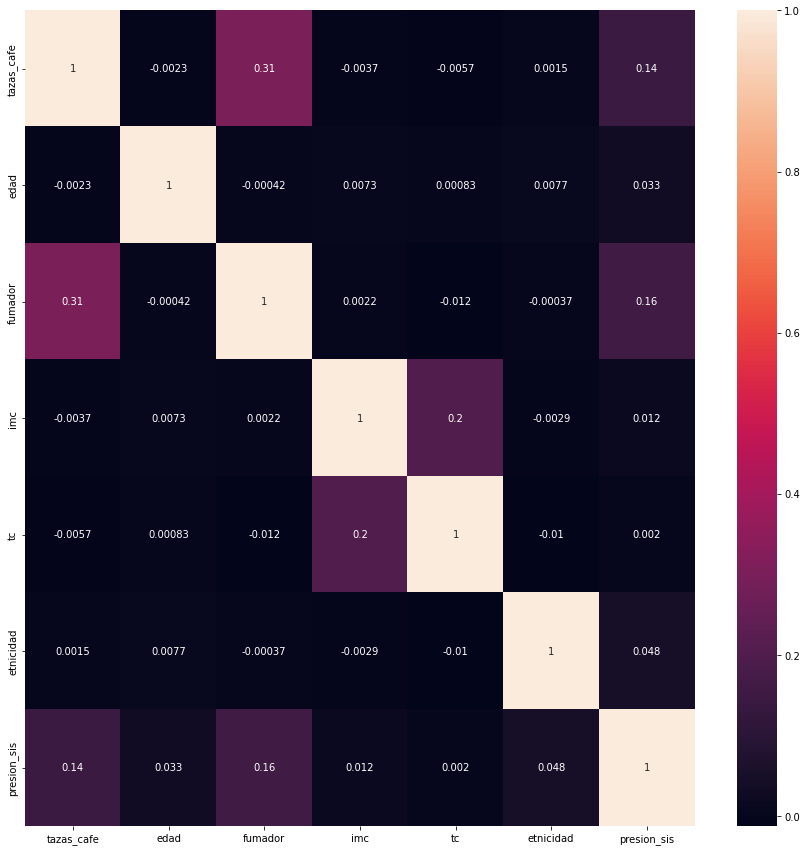

In [12]:
import matplotlib.pyplot as plt

correlation_mat = data.corr()
plt.figure(figsize=(15,15))
ax=sns.heatmap(correlation_mat, annot = True)
plt.show(ax)

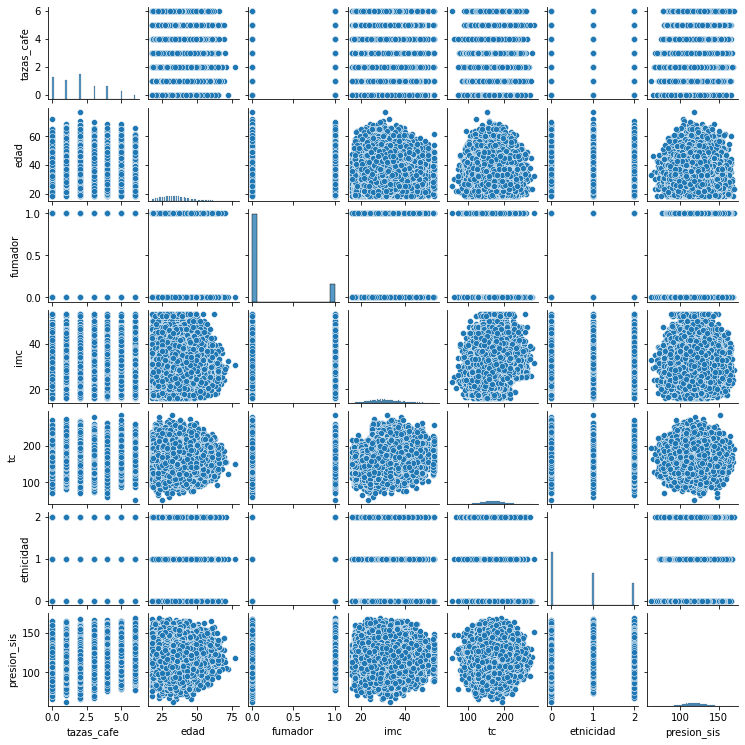

In [13]:
sns.pairplot(data, height = 1.5, palette = 'rocket')

In [15]:
import plotly.express as px
fig = px.sunburst(data_frame = data,
                 path = ['tazas_cafe','fumador','etnicidad'],
                 color = 'presion_sis',
                 maxdepth = -1,
                 title = 'tazas_cafe > fumador')
fig.update_traces(textinfo = 'label+percent parent')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()

### Resultado de la exploración de datos

**Descricción de variables**

|id|Descripción|
|--|--|
|tazas_cafe|ordinal
|edad|ordinal
|genero|nominal
|fumador|nominal
|imc|ordinal
|ec|ordinal
|etnicidad|nominal
|presion_sis|ordinal

## I. 2.
### Problemas de calidad de los datos

Luego de la exploración de datos se observa que faltan variables en algunos registros, con funciones de ayuda como missingno (gráficamente) y dropna (funcionalmente) se buscan y se elimina, estan localizadas en "edad" 6% e "imc" 3%.

Estos datos de variables faltantes se retiran de los datos a analizar estos representan el 10% de todos los datos.

Los datos duplicados también se retiran, estos representan el 43% de todos los registros.

Con los registros sin variables faltantes y sin datos duplicados se hace un perfilamiento de variables y se analiza.

## I. 3.
### Visualizaciones bivariadas

In [154]:
import plotly.express as px
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

In [148]:
data_b=data.groupby(['tazas_cafe','fumador']).count().reset_index()[['tazas_cafe','fumador','presion_sis']]
data_b.columns=['tazas_cafe','fumador','count']
data_b.head(5)

tazas_cafe  fumador  count
0         0.0        0  11895
1         0.0        1    192
2         1.0        0   9552
3         1.0        1    788
4         2.0        0  11944

In [150]:
#Gráfico de barra
fig = px.bar(data_b, x="tazas_cafe", y="count", color="fumador")
fig.show()

In [141]:
#Gráfico de dispersión
fig = px.scatter(data, x="tazas_cafe", y="presion_sis")
fig.show()



#### **¿El alto consumo de café puede estar relacionado con una mayor presión sistólica?**

En la observación de correlación de variables, se observa que el consumo de cafe esta correlacionado con la presión sistólica

#### **otros factores que pueden estar asociados con una mayor presión sistólica.**

En la observación de correlación se observa que la variable de fumador y etnicidad tambien estan asociadas a la presión sistólica, pero no impactan tanto como el café

# II .Pruebas de hipótesis y correlación

**Hipótesis:** el café afecta la presión *sistólica*

## II. 4.

#### Prueba t-test


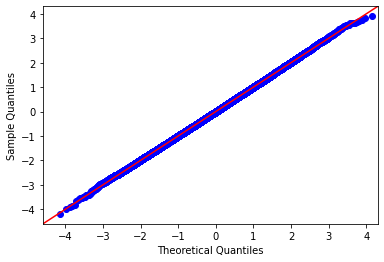

In [155]:
fig = sm.qqplot(data['presion_sis'], stats.t, fit=True, line="45")
plt.show()

**Conclusiones:**
No se observa un aumento de presión sistólica por el consumo de café, es siempre disperso y no tiene tampoco que ver con la cantidad o no tiene mucha significacia

## II. 5.
**Calcule y analice la correlación entre las variables y la presión sistólica. Escriba sus conclusiones al respecto.**

En las gráficas de pperfilamento se observa que existe una correlacion entre las tazas de caé y si fuma o no, y una baja correlción e la etnía

**¿Existen factores protectores?**

No se observa ninguno

**¿Cuáles factores de riesgo puede descubrir?**

En la gráfica de barras se observa que fumar aumenta un poco la presión sistólica


## II. 6. 
**¿Existen problemas de multicolinealidad en los datos?**

Los análisis de perfilamiento no indican que exista multicolinealidad

**¿Cómo se pueden interpretar?**

Al no haber alta correlación se puuede decir que no hay problemas de esste tipo

**¿Qué problemas se pueden presentar en el análisis?**

Estar zesgado por una hipotesis de prejuicio 

**¿Cómo puede corregirlos? Sea específico con respecto al caso de estudio.**

Se puede lanzar esta hipotesis y comprobarla mediante funciones

# III. Análisis con regresión lineal

## III. 1. **¿Existe una relación entre el número de tazas de café y la presión sistólica?**

### **Regresión lineal multivariable**
#### Construcción del modelo

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [105]:
# Se selecciona la variable objetivo
Y=data['presion_sis']
# Simple
X=data[['tazas_cafe']]

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=13)
modelo_regresion = LinearRegression()
modelo_regresion

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
modelo_regresion.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = modelo_regresion.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_train, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_train, y_pred))
print('R²: %.2f' % r2_score(Y_train, y_pred))

MSE: 13.16
MAE: 10.49
R²: 0.02


### III. 2. **Regresión lineal multivariable**
#### Construcción del modelo

##### Sin modificar

In [121]:
# Se selecciona la variable objetivo
Y=data['presion_sis']
# Simple
X=data[['tazas_cafe', 'fumador', 'etnicidad']]

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=13)
modelo_regresion = LinearRegression()
modelo_regresion

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
modelo_regresion.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = modelo_regresion.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_train, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_train, y_pred))
print('R²: %.2f' % r2_score(Y_train, y_pred))

MSE: 13.04
MAE: 10.40
R²: 0.04


##### Modificando la salida

In [193]:
# Se selecciona la variable objetivo
Y=data['presion_sis']
# Simple
X=data[['tazas_cafe', 'fumador', 'etnicidad']]

poly = PolynomialFeatures(degree=2)
poly_X = poly.fit_transform(X)

# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
poly_X_train, poly_X_test, poly_Y_train, poly_Y_test = train_test_split(poly_X, Y, test_size = 0.2, random_state = 0)

# Creación del objeto de la clase LinearRegression y ajuste del modelo a los datos.
modelo_regresion_poly = LinearRegression()
# Podemos verificar que lo hemos construido.
modelo_regresion_poly

modelo_regresion_poly.fit(poly_X_train, poly_Y_train)

y_pred = modelo_regresion_poly.predict(poly_X_test)

# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print('Métricas')
print('------ Modelo de regresión lineal polinomial múltiple----')
print("MSE: %.2f" % mean_squared_error(poly_Y_test, y_pred, squared=True))
print("RMSE: %.2f" % mean_squared_error(poly_Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(poly_Y_test, y_pred))
print('R²: %.2f' % r2_score(poly_Y_test, y_pred))

Métricas
------ Modelo de regresión lineal polinomial múltiple----
MSE: 164.89
RMSE: 12.84
MAE: 10.28
R²: 0.07


**Justificación:** Se escoge adicionalmente "fumador" y "etnicidad" pporque estas demostraron tener algo de correlación, igualmente dado que R² no llega ni a 0.1 se puede concluir que tomar cafe no afecta la presión sistólica

### III. 3. **Recomendaciones**
Puede beber tranquilamente café que no se encuentran datos asociados del consumo a una presión sistólica